In [ ]:
#Use the Kaggle API to download the dataset
#!kaggle competitions download -c home-credit-default-risk

In [ ]:
#!unzip \*.zip  && rm *.zip

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Let's form a Hypotheses

Primary goal to find a group of people that has the smallest chance for default. In order to do it, we need to explore their past, balance, loanes, cash, and how long it did take them to do so. We will explore each data set and choose a few interesting columns. Than build some trivial data visualisation.

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import os
os.chdir(r'/content/drive/My Drive/')

# Finding Columns

In [101]:
df0= pd.read_csv("bureau.csv")

In [86]:
df0.head(4)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN


From this data set we will choose DAYS_CREDIT = How many days before current application did client apply for Credit Bureau credit, AMT_CREDIT_SUM = Current credit amount for the Credit Bureau credit, AMT_CREDIT_SUM_DEBT = Current debt on Credit Bureau credit, AMT_CREDIT_SUM_OVERDUE = Current amount overdue on Credit Bureau credit

In [5]:
df1= pd.read_csv("bureau_balance.csv")

<ipython-input-5-cbd2e11a0a76>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv("bureau_balance.csv")


In [ ]:
df1.head(4)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C


Nothing inteteresting in particular

In [6]:
df2= pd.read_csv("POS_CASH_balance.csv")

In [ ]:
df2.head(4)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0


Could be interesting if we had enough resources to utilise it.

In [102]:
df3= pd.read_csv("credit_card_balance.csv")

In [88]:
df3.head(4)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907.0,-6.0,56.970,135000.0,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1.0,0.0,1.0,35.0,Active,0.0,0.0
1,2582071,363914.0,-1.0,63975.555,45000.0,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1.0,0.0,0.0,69.0,Active,0.0,0.0
2,1740877,371185.0,-7.0,31815.225,450000.0,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0.0,0.0,0.0,30.0,Active,0.0,0.0
3,1389973,337855.0,-4.0,236572.110,225000.0,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1.0,0.0,0.0,10.0,Active,0.0,0.0


From this data set we choose AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_TOTAL_RECEIVABLE, CNT_INSTALMENT_MATURE_CUM

In [8]:
df4= pd.read_csv("previous_application.csv")

In [ ]:
df4.head(4)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0


In [9]:
df5= pd.read_csv("installments_payments.csv")

In [ ]:
df5.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130


In [10]:
df6= pd.read_csv("HomeCredit_columns_description.csv", encoding='cp1252')

In [ ]:
df6.head(4)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN


In [103]:
# Extract columns from df0
df0_cols = df0[['DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE', 'SK_ID_CURR']]

# Extract columns from df3
df3_cols = df3[['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'SK_ID_CURR',
                'AMT_DRAWINGS_CURRENT', 'AMT_TOTAL_RECEIVABLE', 'CNT_INSTALMENT_MATURE_CUM']]
# Merge the datasets on the common ID column
df6 = df_merged = pd.merge(df0_cols, df3_cols, on='SK_ID_CURR', how='inner')

the datasets are merged based on 'SK_ID_CURR' column.

We just combined two data sets by their id's while keeping integrity of a data set. In other words. If id=1 and another id=1 it will insert numbers from one columns to the other with respect to each other.

In [47]:
df6 = pd.read_csv('df6.csv')

In [48]:
df6 = df6.dropna()

In [49]:
# Do same thing for TARGED
df8= pd.read_csv("application_train.csv")
# Extract columns from df6
df6_cols = df6[['DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE', 'SK_ID_CURR',
                'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
                'AMT_DRAWINGS_CURRENT', 'AMT_TOTAL_RECEIVABLE', 'CNT_INSTALMENT_MATURE_CUM']]

# Extract columns from df8
df8_cols = df8[['TARGET', 'SK_ID_CURR']]
# Merge the datasets on the common ID column
df7 = df_merged = pd.merge(df6_cols, df8_cols, on='SK_ID_CURR', how='inner')
#df7 = df7.join(df8['TARGET'])
#df7 = df7.drop("Unnamed: 0", axis=1)

print (df7.dtypes)

DAYS_CREDIT                    int64
AMT_CREDIT_SUM               float64
AMT_CREDIT_SUM_DEBT          float64
AMT_CREDIT_SUM_OVERDUE       float64
SK_ID_CURR                     int64
AMT_BALANCE                  float64
AMT_CREDIT_LIMIT_ACTUAL      float64
AMT_DRAWINGS_ATM_CURRENT     float64
AMT_DRAWINGS_CURRENT         float64
AMT_TOTAL_RECEIVABLE         float64
CNT_INSTALMENT_MATURE_CUM    float64
TARGET                         int64
dtype: object


In [50]:
df7.head()

,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,SK_ID_CURR,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,TARGET
0,-497,91323.0,0.0,0.0,215354,424505.025,450000.0,279000.0,279000.00,424689.120,6.0,0
1,-497,91323.0,0.0,0.0,215354,133842.150,450000.0,0.0,0.00,133842.150,9.0,0
2,-497,91323.0,0.0,0.0,215354,146877.660,450000.0,135000.0,150150.51,147896.730,4.0,0
3,-497,91323.0,0.0,0.0,215354,440171.190,450000.0,0.0,0.00,440171.190,7.0,0
4,-497,91323.0,0.0,0.0,215354,370571.985,450000.0,270000.0,270000.00,370571.985,25.0,0


In [51]:
# Count occurrences of 1 in 'TARGET' column
count_1 = df7['TARGET'].value_counts()[1]
df7.to_csv('df7.csv')

# Print the count
print("Count of difficulty paiments in 'TARGET' column:", count_1)

Count of difficulty paiments in 'TARGET' column: 446720


In [52]:
# print data types and describe data
print (df7.dtypes)
df7.describe()

DAYS_CREDIT                    int64
AMT_CREDIT_SUM               float64
AMT_CREDIT_SUM_DEBT          float64
AMT_CREDIT_SUM_OVERDUE       float64
SK_ID_CURR                     int64
AMT_BALANCE                  float64
AMT_CREDIT_LIMIT_ACTUAL      float64
AMT_DRAWINGS_ATM_CURRENT     float64
AMT_DRAWINGS_CURRENT         float64
AMT_TOTAL_RECEIVABLE         float64
CNT_INSTALMENT_MATURE_CUM    float64
TARGET                         int64
dtype: object


,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,SK_ID_CURR,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,TARGET
count,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06,5.631445e+06
mean,-1.193735e+03,3.499022e+05,1.390976e+05,1.601278e+01,2.779823e+05,6.815963e+04,1.397885e+05,4.628062e+03,7.136907e+03,6.796462e+04,2.416755e+01,7.932600e-02
std,8.053638e+02,8.032546e+05,6.222408e+05,3.853468e+03,1.023045e+05,1.108224e+05,1.452235e+05,2.414844e+04,3.275370e+04,1.105231e+05,1.941301e+01,2.702469e-01
min,-2.922000e+03,0.000000e+00,-2.014753e+06,0.000000e+00,1.000110e+05,-1.353590e+05,0.000000e+00,0.000000e+00,-5.195700e+02,-1.334422e+05,0.000000e+00,0.000000e+00
25%,-1.732000e+03,5.095292e+04,0.000000e+00,0.000000e+00,1.894790e+05,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00
50%,-1.056000e+03,1.350000e+05,0.000000e+00,0.000000e+00,2.775250e+05,1.305000e+02,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,0.000000e+00
75%,-5.120000e+02,3.420000e+05,4.814550e+04,0.000000e+00,3.665500e+05,1.107712e+05,1.800000e+05,0.000000e+00,0.000000e+00,1.107240e+05,3.500000e+01,0.000000e+00
max,-1.000000e+00,5.803200e+07,6.457024e+07,3.681063e+06,4.562470e+05,1.229704e+06,1.350000e+06,1.676250e+06,1.783582e+06,1.229704e+06,1.200000e+02,1.000000e+00


In our surprise and not. Multiple means are seems to be identical to each other. It is either because those data sets are identical to each other or a fortunate partern.

# Cleaning and visualisation

In [35]:
#Drop SK_ID_CURR                     
df7 = df7.drop(columns='SK_ID_CURR')

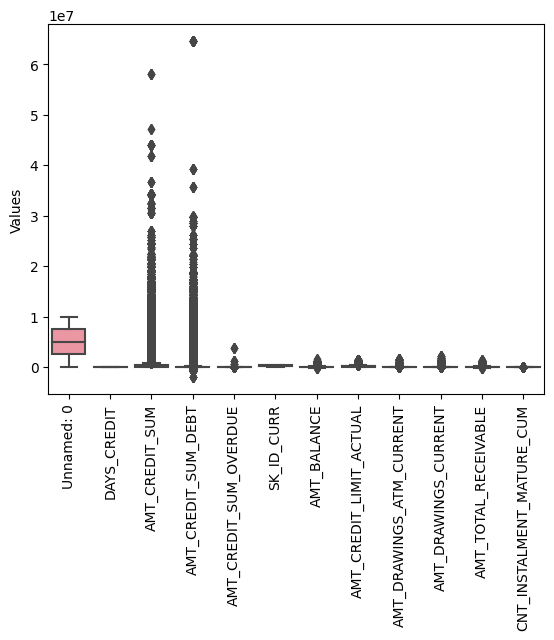

In [36]:
# Create the boxplot
sns.boxplot(data=df6)
# Label the y-axis
plt.ylabel('Values')
# Rotate the x-axis tick labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

Those are data points without triming outliers.

In [38]:
# Only consider numeric columns for computing IQR
numeric_cols = df7.select_dtypes(include='number')

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df7 = df7[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
df7.to_csv('df7_nout.csv')

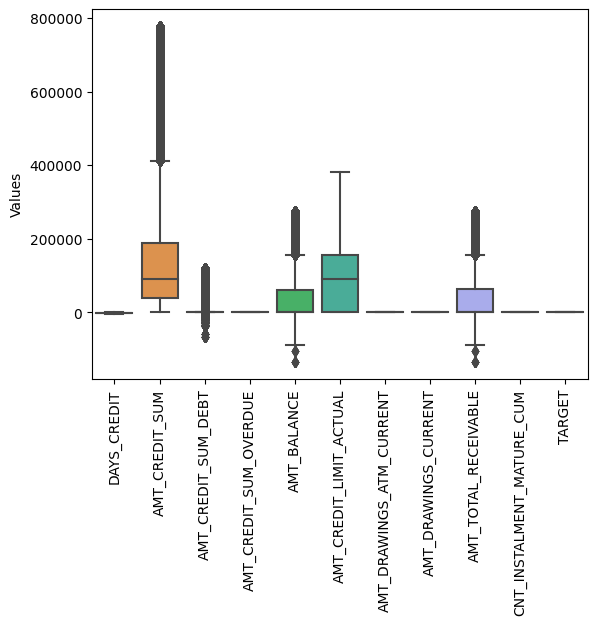

In [39]:
# Create the boxplot
sns.boxplot(data=df7)
# Label the y-axis
plt.ylabel('Values')
# Rotate the x-axis tick labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

Those are data points with initial driming if out liers. This data seems to be pretty messy.

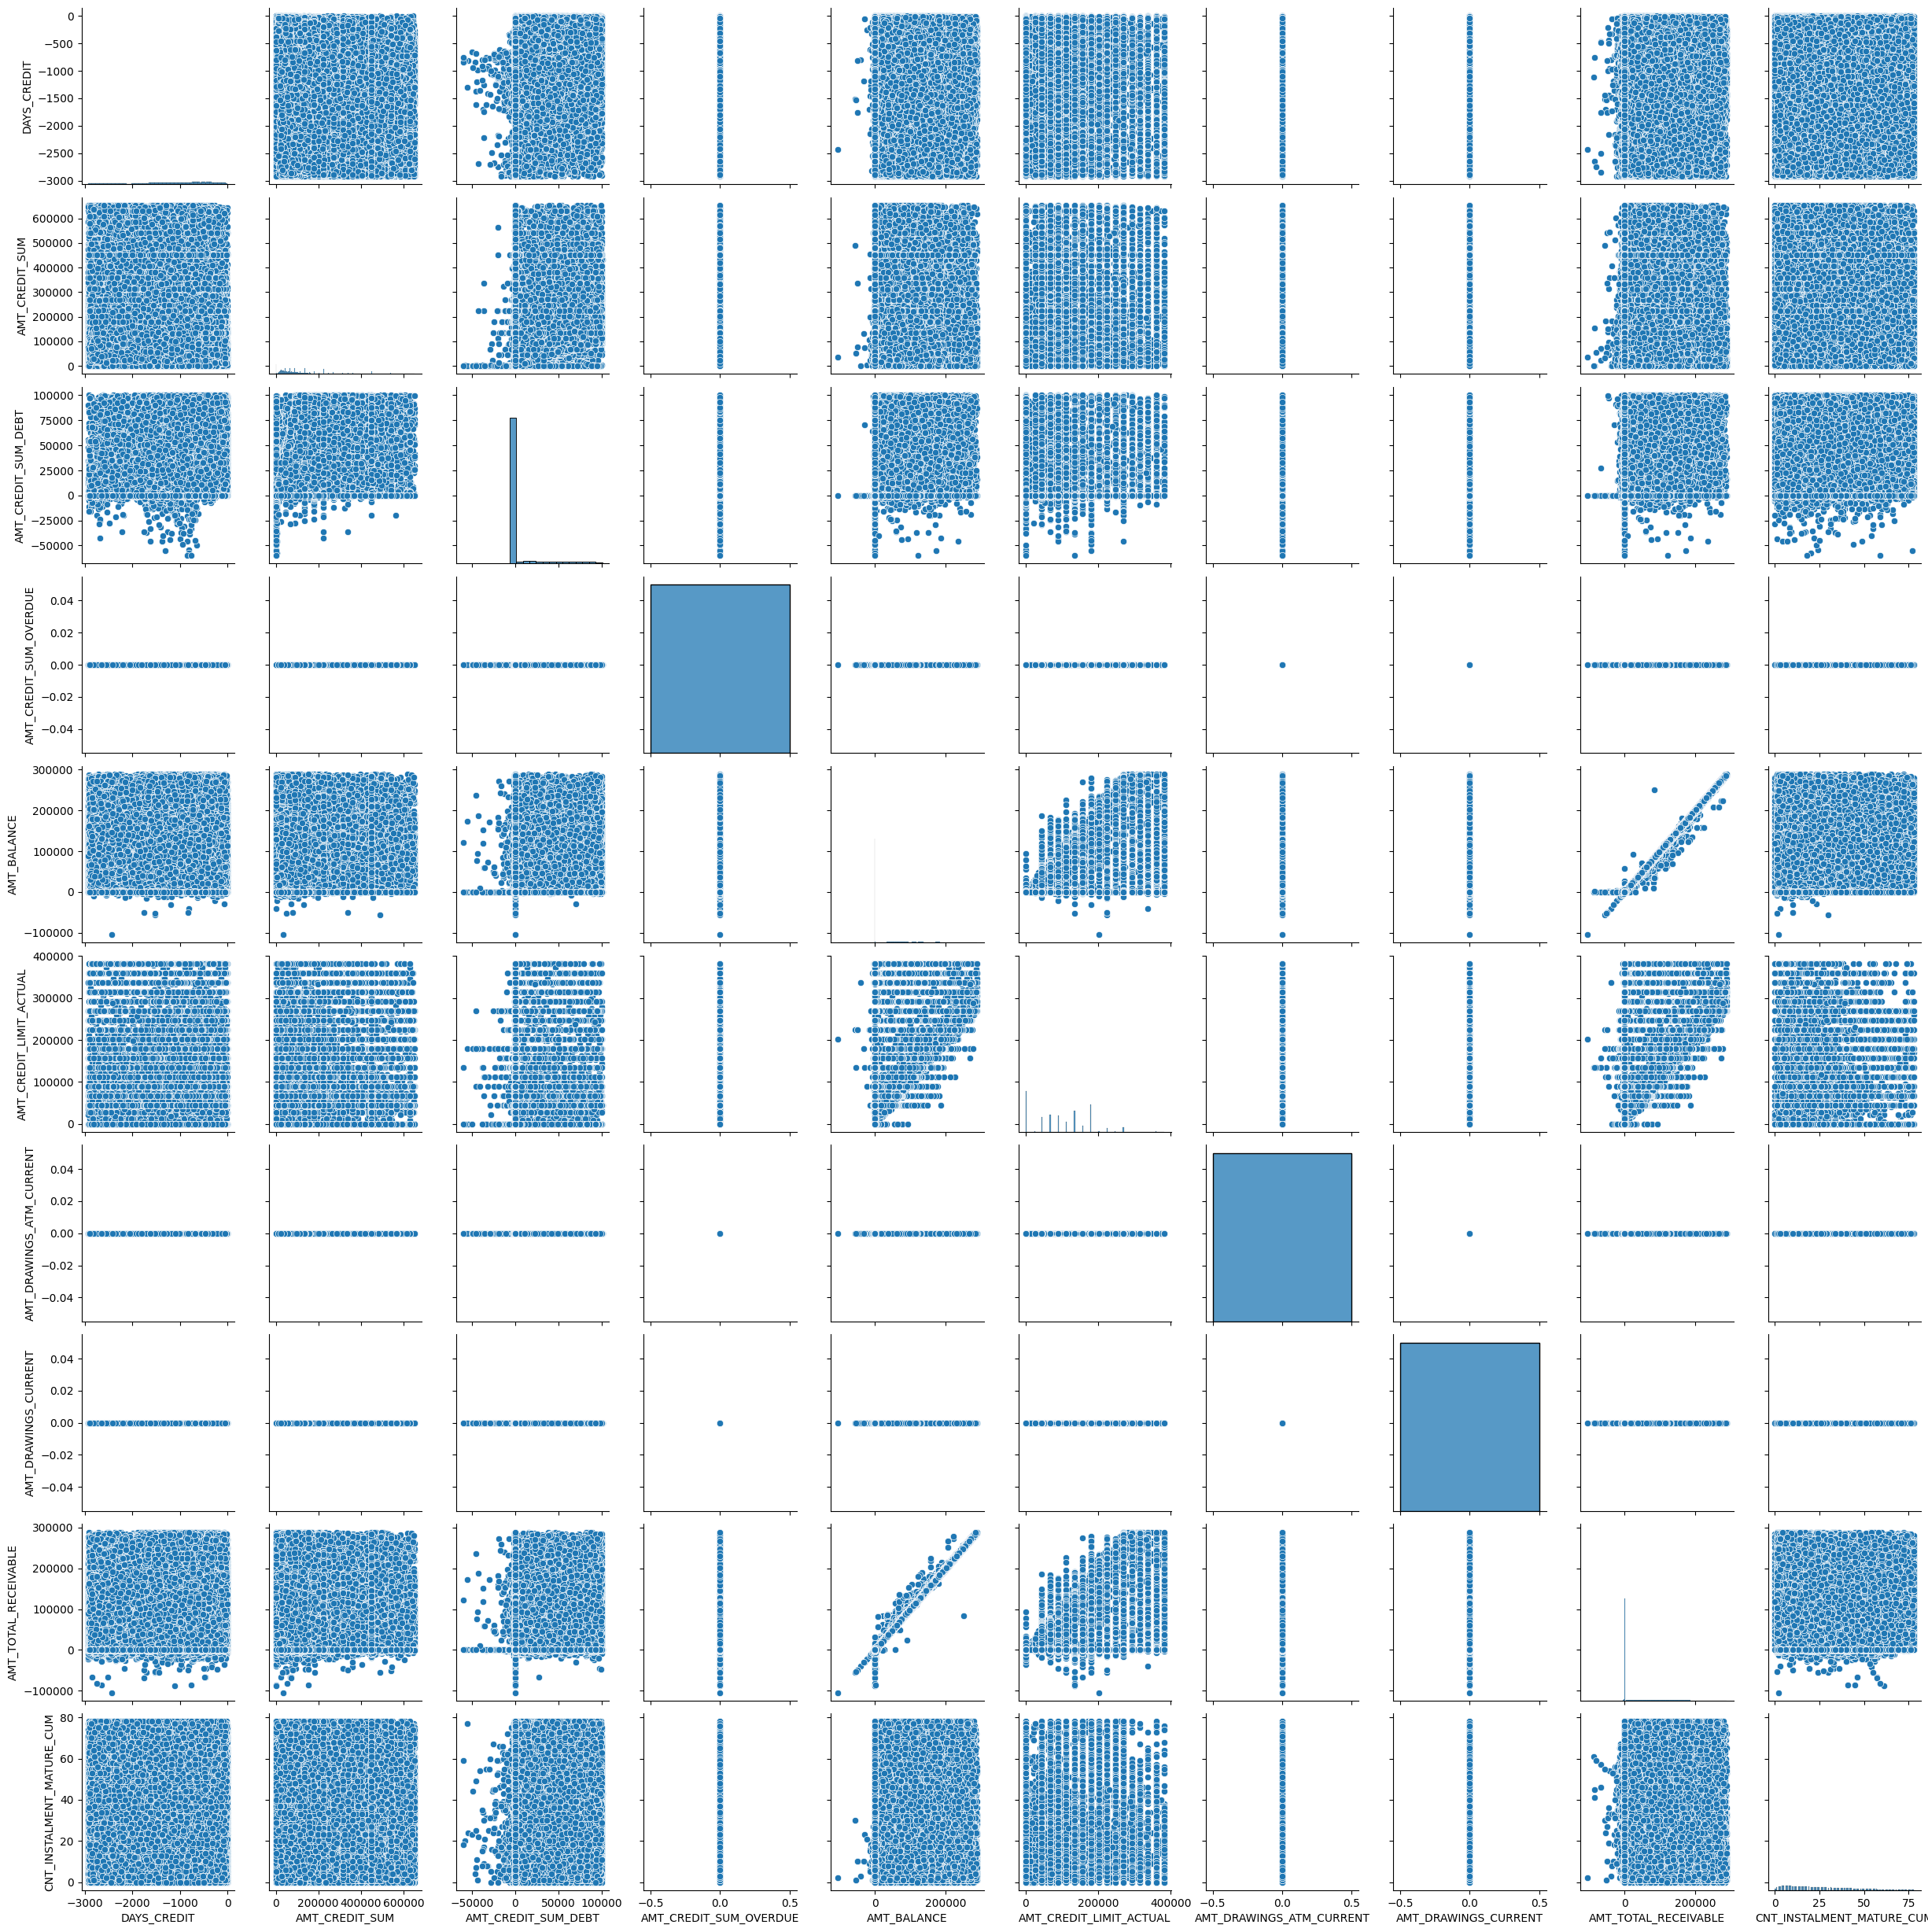

In [ ]:
sns.pairplot(df7)

This plot does not seem very interestic, so let's explore more of this data. As we chose our columns and performed basic data cleaning let's take a look how those columns compared to a TARGET.

# Explore Target vs Chosen Columns

In [40]:
df7['TARGET'].count()

3066197

In [41]:
df7['TARGET'].describe()

count    3066197.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: TARGET, dtype: float64

Most people in this data set do not have difficulties with their payments

In [44]:
# Count occurrences of 0 in 'TARGET' column
count_1 = df7['TARGET'].value_counts()[0]

# Print the count
print("Count of no difficulties in 'TARGET' column:", count_1)

Count of no difficulties in 'TARGET' column: 3066197


Note, 1 = difficulty with payments and 0 = no_difficulty with a total count of 3066197

<Axes: >

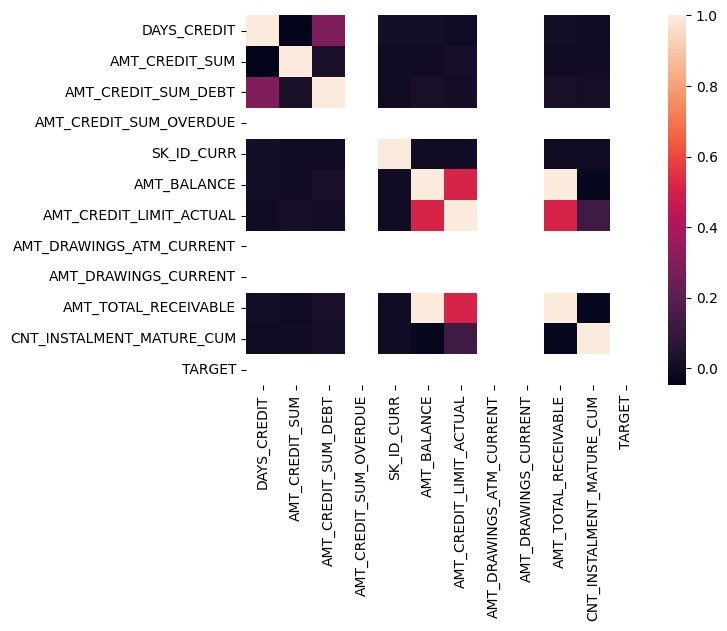

In [22]:
sns.heatmap(df7.corr())

As we can see this data set is extrimelly "dirty". It determined that all people who have difficulties are outliers. Which means that it is wise to trim outliers only for a target rather than for the bigest data set. It must be explroed in the future. As a result we will utilise un trimed data with multiple outliers.

# Working with outliers and un cleaned data set

In [7]:
df7 = pd.read_csv('df7.csv')

In [55]:
# Count occurrences of 1 in 'TARGET' column
count_1 = df7['TARGET'].value_counts()[1]# Count occurrences of 0 in 'TARGET' column
count_0 = df7['TARGET'].value_counts()[0]

# Print the count
print("Count of no difficulties in 'TARGET' column:", count_0)

# Print the count
print("Count of difficulties in 'TARGET' column:", count_1)

Count of no difficulties in 'TARGET' column: 5184725
Count of difficulties in 'TARGET' column: 446720


<Axes: >

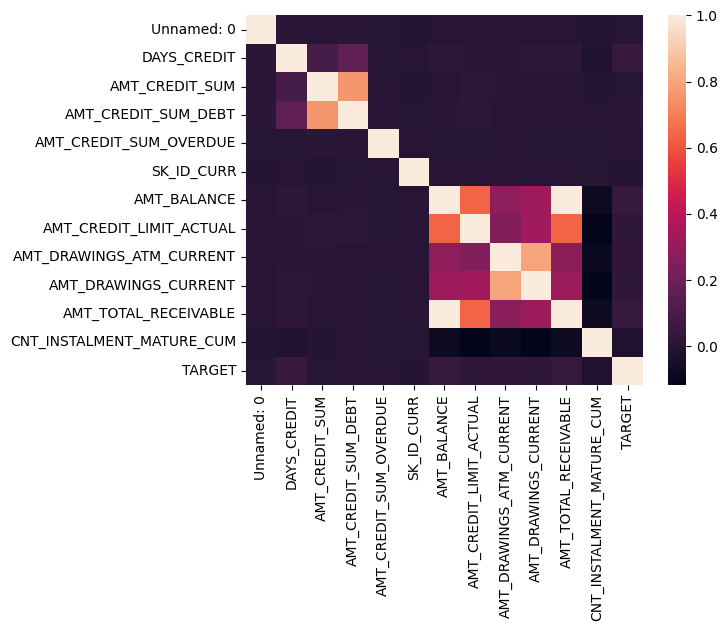

In [56]:
sns.heatmap(df7.corr())

As we can see on this heatmap, there is not much of a relation between the target and other parameters. Still, we were able to :improve" heat map and increased relationship between some columns. Let's explore what we might figure out or find. It is possible that these correlations are hidden. We think that this data set is one of those moment where we will have to work with out liers.

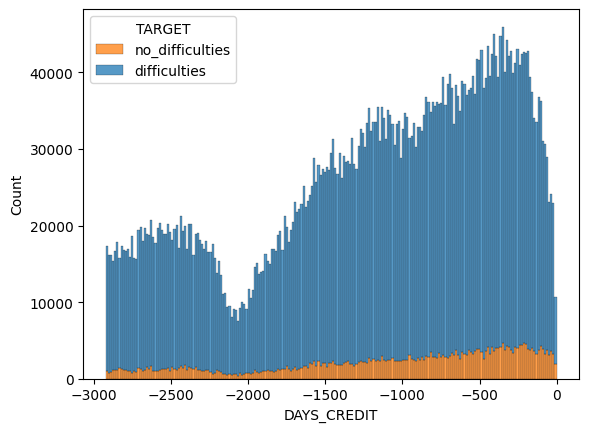

In [57]:
# Define the mapping of values to labels
target_labels = {0: 'no_difficulties', 1: 'difficulties'}

# Create the stacked histogram
sns.histplot(data=df7, x='DAYS_CREDIT', hue='TARGET', multiple='stack')

# Set the x-axis label
plt.xlabel('DAYS_CREDIT')

# Set the legend labels
plt.legend(title='TARGET', labels=target_labels.values())

# Display the plot
plt.show()

As we observe, the number of people experiencing difficulties increases closer to 0, with a steep drop near 0. It seems that the best value for DAYS_CREDIT would be between -500 and 0. It might be useful in further research. We think that this is due to how much money people have or initially had.

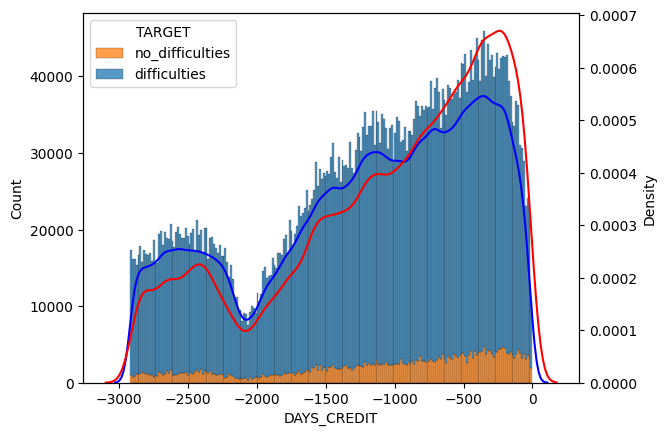

In [58]:
#@title Same plot with density
# Define the mapping of values to labels
target_labels = {0: 'no_difficulties', 1: 'difficulties'}

# Create the subplots
fig, ax = plt.subplots()

# Create the stacked histogram
sns.histplot(data=df7, x='DAYS_CREDIT', hue='TARGET', multiple='stack', ax=ax)

# Set the x-axis label
ax.set_xlabel('DAYS_CREDIT')

# Set the legend labels
ax.legend(title='TARGET', labels=target_labels.values())

# Create a twin axis for the density plot
ax2 = ax.twinx()

# Create the density plot
sns.kdeplot(data=df7[df7['TARGET'] == 0]['DAYS_CREDIT'], color='blue', ax=ax2, label='no_difficulties')
sns.kdeplot(data=df7[df7['TARGET'] == 1]['DAYS_CREDIT'], color='red', ax=ax2, label='difficulties')

# Set the y-axis label for the density plot
ax2.set_ylabel('Density')

# Display the plot
plt.show()


A blue line is a line density for no_difficulties and blue line density is for with difficulties. As we can see, our base assumption for -500 and 0 was correct. We see a clear and defined separation between difficulties to pay and no difficulties. Note that there are some regions where differences are more defined, and this can be used in the future. Also, we observed that those people who are having difficulties to pay, their density increases as we are approaching 500 days. It is not 100% clear why. Most likelly it is due to miss culculations or short term thinking.

It seems that the most rational approach would be to build a ratio between difficulties and non-difficulties, rather than building three models predicting difficulties, no difficulties, and both. This could provide us with better predictions. Let's say we build a perfect model for no difficulties, but we know that the ratio decreases accuracy only by ~5%. In this case, if the bias is less than 1%, we maintain 90% accuracy with an f1-score of ~90%. In such a scenario, we would not reduce the accuracy of our model at the end. This strategy could work for any of these models as long as our model is reliable.

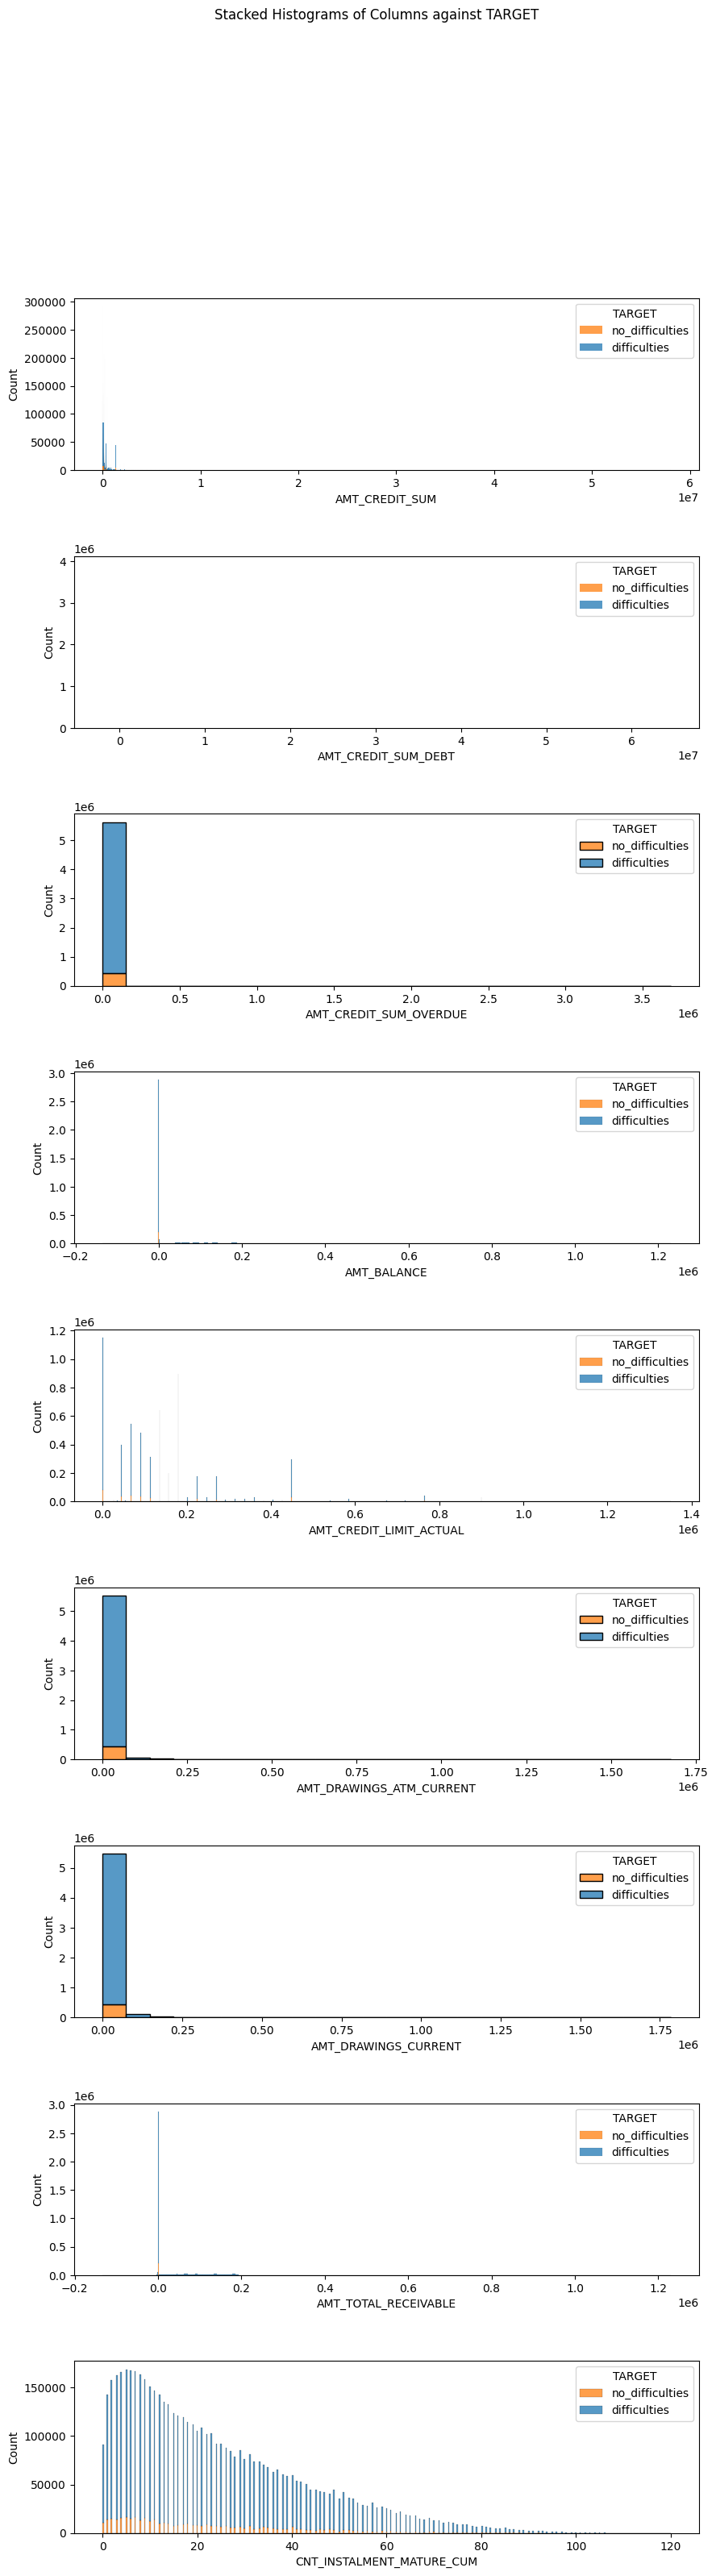

In [8]:
#@title Same plot for remainign columns 
# Define the mapping of values to labels
target_labels = {0: 'no_difficulties', 1: 'difficulties'}

# Specify the columns
columns = [
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_OVERDUE',
    'AMT_BALANCE',
    'AMT_CREDIT_LIMIT_ACTUAL',
    'AMT_DRAWINGS_ATM_CURRENT',
    'AMT_DRAWINGS_CURRENT',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_INSTALMENT_MATURE_CUM'
]

# Set the figure size and spacing
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 4 * len(columns)))
fig.subplots_adjust(hspace=0.5)

# Set the title
fig.suptitle('Stacked Histograms of Columns against TARGET')

# Iterate over each column
for i, col in enumerate(columns):
    # Create the stacked histogram
    sns.histplot(data=df7, x=col, hue='TARGET', multiple='stack', ax=axes[i])
    
    # Set the x-axis label
    axes[i].set_xlabel(col)
    
    # Set the legend labels
    axes[i].legend(title='TARGET', labels=target_labels.values())

# Display the plot
plt.show()


It seems that credit limit actual might play a big roll in making our model. As limit increas difficulties decrease, but it is not 100% clear. Moreover, it looks like everything related to AMT might have a great potential in finding reliable model if we drop values at 0. It looks like as AMT columns shifting away from 0 rate of difficulties decreasing dramatically. It might lead us toward some interesting ideas such as triming data and building a model within very specific data rangies.

In [10]:

# Compute the correlation matrix
corr_matrix = df7.corr()

# Get correlations for 'TARGET'
target_correlations = corr_matrix['TARGET']

# Sort correlations from highest to lowest
sorted_correlations = target_correlations.sort_values(ascending=False)

# Print sorted correlations for 'TARGET'
print("Sorted Correlations for 'TARGET':")
print(sorted_correlations)


Sorted Correlations for 'TARGET':
TARGET                       1.000000
DAYS_CREDIT                  0.048219
AMT_BALANCE                  0.041812
AMT_TOTAL_RECEIVABLE         0.041669
AMT_DRAWINGS_ATM_CURRENT     0.022903
AMT_CREDIT_LIMIT_ACTUAL      0.019777
AMT_DRAWINGS_CURRENT         0.018100
AMT_CREDIT_SUM_DEBT          0.012317
AMT_CREDIT_SUM_OVERDUE       0.003145
AMT_CREDIT_SUM              -0.001174
Unnamed: 0                  -0.003680
SK_ID_CURR                  -0.007247
CNT_INSTALMENT_MATURE_CUM   -0.025695
Name: TARGET, dtype: float64


As we can see, in this correlation print, we do not observe a lot of correlation between chosen columns. However, it is likely due to the nature of the data set and skewness of the data set, more towards having difficulties. It is possible that we are dealing with problematic regional bank's data.

In this paper, we primarilly were focusing on financial knowledge. While it is true that some other paramters might have a better correlation. Still, we were trying to build a model that would could allow companies to make right desicions whith little to non data abaut the loaner. We want to highlight that this is one of the most chalenging data sets that we've ver had to work with. Those data sets are not only from different times, but also from different clients and all of that together at the same time. From prespective of data engineering is probably the highest level of difficulties. We concluded that in order to build and effective model. Engineer will have to spend countless hours exploring this data set in order to achive reliable f1-score with low bias and high long tirm prediction. Long tirm prediction is probably the most important parameters since most of home loans are long tirm 30 years loans.

Concernce, it is not clear if we did merge files in upropriate manner and within elite standards. One think is clear, more research must be done.